In [1]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
fileE = "Data/ExcessWind.csv" 
df = pd.read_csv(fileE, parse_dates=[1], na_values=" ")

In [4]:
df.head()

,Unnamed: 0,date,Year,Month,Hour,rain_BEL,temp_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,...,vappr_MAL,rhum_MAL,msl_MAL,wdsp_MAL,wddir_MAL,ActualDemandMW,ActualWindMW,ActualGenerationMW,RatioWindDemand,ExcessWind
0,0,2017-07-01 00:00:00,2017,Jul,0:00,0.0,12.3,11.3,10.3,12.5,...,10.2,84,1016.8,10,270,2534.00,330.00,2709.00,0.130229,0.0
1,1,2017-07-01 01:00:00,2017,Jul,1:00,0.0,12.5,11.4,10.4,12.6,...,10.3,84,1016.2,10,260,2336.75,353.50,2689.75,0.151278,0.0
2,2,2017-07-01 02:00:00,2017,Jul,2:00,0.0,13.0,11.9,10.9,13.0,...,10.9,88,1015.8,10,220,2187.50,383.75,2680.75,0.175429,0.0
3,3,2017-07-01 03:00:00,2017,Jul,3:00,0.0,12.9,12.0,11.2,13.3,...,10.1,89,1015.4,10,190,2138.25,440.50,2762.50,0.206010,0.0
4,4,2017-07-01 04:00:00,2017,Jul,4:00,0.0,13.3,12.7,12.2,14.2,...,10.0,89,1015.2,10,190,2098.00,438.75,2550.75,0.209128,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'Year', 'Month', 'Hour', 'rain_BEL', 'temp_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL', 'wdsp_BEL',
       'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB', 'dewpt_DUB',
       'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB', 'wddir_DUB', 'ww_DUB',
       'w_DUB', 'sun_DUB', 'vis_DUB', 'clht_DUB', 'clamt_DUB', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt', 'rain_COR', 'temp_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'wdsp_COR',
       'wddir_COR', 'ww_COR', 'w_COR', 'sun_COR', 'vis_COR', 'clht_COR',
       'clamt_COR', 'rain_MAL', 'temp_MAL', 'wetb_MAL', 'dewpt_MAL',
       'vappr_MAL', 'rhum_MAL', 'msl_MAL', 'wdsp_MAL', 'wddir_MAL',
       'ActualDemandMW', 'ActualWindMW', 'ActualGenerationMW',
       'RatioWindDemand', 'ExcessWind'],
      dtype='object')

In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.describe()

,Year,rain_BEL,temp_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,msl_BEL,wdsp_BEL,wddir_BEL,...,vappr_MAL,rhum_MAL,msl_MAL,wdsp_MAL,wddir_MAL,ActualDemandMW,ActualWindMW,ActualGenerationMW,RatioWindDemand,ExcessWind
count,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,...,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000,46032.000000
mean,2019.616267,0.151807,10.723614,9.304734,7.720831,10.915174,82.009798,1012.376195,11.899635,201.557829,...,10.585925,81.467436,1011.832921,14.749109,202.748957,3376.643191,1078.091160,3360.779436,0.320898,0.076382
std,1.557998,0.503334,4.001554,3.808060,4.268925,3.085598,11.174165,13.090315,6.598940,93.289032,...,3.023919,9.869051,13.172766,7.267588,86.520278,621.675679,811.867985,596.966791,0.234699,0.265611
min,2017.000000,0.000000,-3.300000,-4.400000,-9.700000,2.900000,24.000000,959.100000,0.000000,10.000000,...,3.400000,20.000000,956.600000,1.000000,0.000000,1934.500000,-44.000000,1506.000000,-0.011761,0.000000
25%,2018.000000,0.000000,7.900000,6.500000,4.600000,8.500000,74.000000,1004.000000,7.000000,150.000000,...,8.100000,75.000000,1003.200000,9.000000,150.000000,2865.187500,360.000000,2952.250000,0.110043,0.000000
50%,2020.000000,0.000000,10.800000,9.500000,8.000000,10.700000,84.000000,1014.000000,11.000000,220.000000,...,10.300000,83.000000,1013.500000,14.000000,210.000000,3433.000000,910.125000,3306.625000,0.275649,0.000000
75%,2021.000000,0.000000,13.700000,12.200000,10.900000,13.000000,91.000000,1021.600000,16.000000,270.000000,...,12.700000,89.000000,1021.000000,19.000000,270.000000,3849.000000,1704.500000,3728.250000,0.512831,0.000000
max,2022.000000,14.900000,28.000000,22.100000,19.400000,22.500000,100.000000,1050.600000,45.000000,360.000000,...,21.500000,100.000000,1051.200000,48.000000,360.000000,5335.750000,3570.000000,5955.500000,0.957785,1.000000


In [11]:
cdf = df[['date','Hour','wdsp','wdsp_BEL','wdsp_DUB','wdsp_COR','wdsp_MAL','ActualWindMW','ActualDemandMW', 'ExcessWind']]

In [14]:
cdf['ExcessWind'].astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
46027    0
46028    0
46029    0
46030    0
46031    0
Name: ExcessWind, Length: 46032, dtype: int32

In [15]:
cdf

,date,Hour,wdsp,wdsp_BEL,wdsp_DUB,wdsp_COR,wdsp_MAL,ActualWindMW,ActualDemandMW,ExcessWind
0,2017-07-01 00:00:00,0:00,6,8,7,7,10,330.00,2534.00,0.0
1,2017-07-01 01:00:00,1:00,4,10,9,7,10,353.50,2336.75,0.0
2,2017-07-01 02:00:00,2:00,2,14,8,7,10,383.75,2187.50,0.0
3,2017-07-01 03:00:00,3:00,5,16,9,4,10,440.50,2138.25,0.0
4,2017-07-01 04:00:00,4:00,4,17,8,5,10,438.75,2098.00,0.0
...,...,...,...,...,...,...,...,...,...,...
46027,2022-09-30 19:00:00,19:00,17,14,14,11,21,2560.00,4033.50,0.0
46028,2022-09-30 20:00:00,20:00,16,13,15,9,20,2591.75,3943.75,0.0
46029,2022-09-30 21:00:00,21:00,15,15,15,7,22,2518.75,3682.00,0.0
46030,2022-09-30 22:00:00,22:00,14,14,14,10,23,2339.50,3389.50,0.0


## Scikit-learn

### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets. 75% of the entire dataset will be used for training and 25% for testing. 

In [17]:
X = np.asarray(cdf[['wdsp','wdsp_BEL','wdsp_DUB','wdsp_COR','wdsp_MAL','ActualWindMW','ActualDemandMW']])
X.shape
X[0:5]

array([[6.00000e+00, 8.00000e+00, 7.00000e+00, 7.00000e+00, 1.00000e+01,
        3.30000e+02, 2.53400e+03],
       [4.00000e+00, 1.00000e+01, 9.00000e+00, 7.00000e+00, 1.00000e+01,
        3.53500e+02, 2.33675e+03],
       [2.00000e+00, 1.40000e+01, 8.00000e+00, 7.00000e+00, 1.00000e+01,
        3.83750e+02, 2.18750e+03],
       [5.00000e+00, 1.60000e+01, 9.00000e+00, 4.00000e+00, 1.00000e+01,
        4.40500e+02, 2.13825e+03],
       [4.00000e+00, 1.70000e+01, 8.00000e+00, 5.00000e+00, 1.00000e+01,
        4.38750e+02, 2.09800e+03]])

In [21]:
y = np.asarray(cdf['ExcessWind'])
y.shape
y [0:5]

array([0., 0., 0., 0., 0.])

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.54627342, -0.59095513, -0.51935412, -0.52655744, -0.65347144,
        -0.92145435, -1.35545329],
       [-0.93215631, -0.28787285, -0.09341481, -0.52655744, -0.65347144,
        -0.89250844, -1.67274436],
       [-1.31803919,  0.31829169, -0.30638446, -0.52655744, -0.65347144,
        -0.85524829, -1.91282392],
       [-0.73921486,  0.62137397, -0.09341481, -1.11927739, -0.65347144,
        -0.785347  , -1.99204615],
       [-0.93215631,  0.77291511, -0.30638446, -0.92170407, -0.65347144,
        -0.78750255, -2.05679122]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36825, 7) (36825,)
Test set: (9207, 7) (9207,)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [25]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[9.99669670e-01, 3.30329664e-04],
       [9.53282595e-01, 4.67174052e-02],
       [6.01605475e-01, 3.98394525e-01],
       ...,
       [9.99852948e-01, 1.47052459e-04],
       [8.97872523e-01, 1.02127477e-01],
       [9.53630422e-01, 4.63695783e-02]])

In [33]:
print('Intercept: ', LR.intercept_)
print('Coeficient: ', LR.coef_)

Intercept:  [-4.53]
Coeficient:  [[ 0.07  0.17 -0.01  0.28  0.02  2.21 -1.43]]


## Evaluation

### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9695860965012577

### confusion matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 461  243]
 [  23 8480]]


Confusion matrix, without normalization
[[ 461  243]
 [  23 8480]]


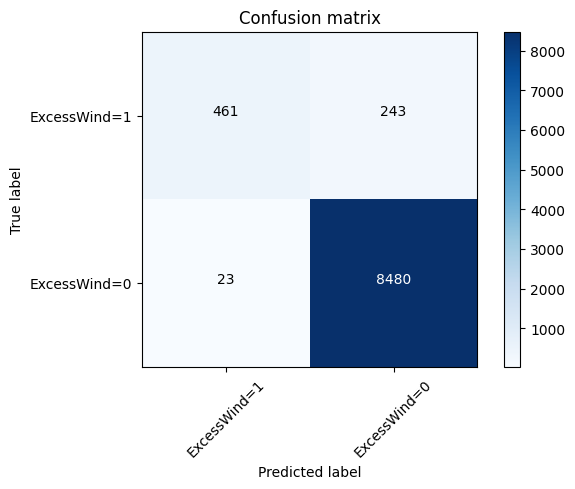

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ExcessWind=1','ExcessWind=0'],normalize= False,  title='Confusion matrix')

In [29]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      8503
         1.0       0.95      0.65      0.78       704

    accuracy                           0.97      9207
   macro avg       0.96      0.83      0.88      9207
weighted avg       0.97      0.97      0.97      9207



In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.09814357840584575